In [2]:
import requests
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore') # ignore warnings

Analysis of the YT Home Feed and Trending pages in 6 different countries

## Requests ##

In [2]:
url = "https://yt-api.p.rapidapi.com/trending"

querystring = {"geo":"US"} # before request change geo

headers = {
	"x-rapidapi-key": "d31f7e5962msh64f6070990dee3dp1df11fjsnb7da1f2108ba",
	"x-rapidapi-host": "yt-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
US = response.json()
US = US['data']
df_US = pd.DataFrame(US)
df_US = df_US.drop(columns = [
    'videoId',
    'channelId',
    'channelHandle',
    'channelThumbnail',
    'publishedTimeText',
    'publishedAt',
    'thumbnail',
    'richThumbnail']) 

df_US['country'] = 'US'
df_US['date'] = pd.Timestamp.now().date() #date 
df_US.to_csv('trending 7 US.csv') # change name for different geo

In [16]:
url = "https://yt-api.p.rapidapi.com/home"

querystring = {"geo":"US"} # before request change geo

headers = {
	"x-rapidapi-key": "d31f7e5962msh64f6070990dee3dp1df11fjsnb7da1f2108ba",
	"x-rapidapi-host": "yt-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
US_hf = response.json()
US_hf = US_hf['data']
df_US_hf = pd.DataFrame(US_hf)

df_US_hf = df_US_hf.drop(columns = [
    'videoId',
    'channelId',
    'channelTitle',
    'channelThumbnail',
    'publishedTimeText',
    'publishDate',
    'thumbnail',
    'richThumbnail',
    'channelId',
    'channelHandle',
    'publishedAt',
    'subtitle'])

df_US_hf['country'] = 'US'
df_US_hf['date'] = pd.Timestamp.now().date() # add date column 
df_US_hf.to_csv('home feed 7 US.csv') # change name

TRENDING

In [14]:
url = "https://yt-api.p.rapidapi.com/trending"

querystring = {"geo":"CA"}

headers = {
	"x-rapidapi-key": "d31f7e5962msh64f6070990dee3dp1df11fjsnb7da1f2108ba",
	"x-rapidapi-host": "yt-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
CA = response.json()
CA = CA['data']
df_CA = pd.DataFrame(CA)
df_CA = df_CA.drop(columns = [
    'videoId',
    'channelId',
    'channelHandle',
    'channelThumbnail',
    'publishedTimeText',
    'publishedAt',
    'thumbnail',
    'richThumbnail',
    'data'])
    
df_CA['country'] = 'CA'
df_CA['date'] = pd.Timestamp.now().date() # add date column 
df_CA.to_csv('trending 7 CA.csv')

HOME FEED

In [15]:
url = "https://yt-api.p.rapidapi.com/home"

querystring = {"geo":"CA"}

headers = {
	"x-rapidapi-key": "d31f7e5962msh64f6070990dee3dp1df11fjsnb7da1f2108ba",
	"x-rapidapi-host": "yt-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
CA_hf = response.json()
CA_hf = CA_hf['data']
df_CA_hf = pd.DataFrame(CA_hf)

df_CA_hf = df_CA_hf.drop(columns = [
    'videoId',
    'channelId',
    'channelTitle',
    'channelThumbnail',
    'publishedTimeText',
    'publishDate',
    'thumbnail',
    'richThumbnail',
    'channelId',
    'channelHandle',
    'publishedAt',
    'subtitle',
    'data'])
df_CA_hf['country'] = 'CA'
df_CA_hf['date'] = pd.Timestamp.now().date() # add date column 
df_CA_hf.to_csv('home feed 7 CA.csv')
df_CA_hf.head(3)

,type,title,description,viewCount,lengthText,isLive,badges,country,date
0,video,Heavy Rain On Roof For Deep Sleep & Insomnia R...,HEAVY RAIN on Roof for Deep Sleep & Insomnia R...,718803,11:55:00,NaN,NaN,CA,2024-10-16
1,shorts_listing,Shorts,NaN,NaN,NaN,NaN,NaN,CA,2024-10-16
2,video_listing,Trending,NaN,NaN,NaN,NaN,NaN,CA,2024-10-16


## merge cvs

In [3]:
# day 1
df1_T_US = pd.read_csv('trending 1 US.csv')
df1_T_ES = pd.read_csv('trending 1 ES.csv')
df1_T_FR = pd.read_csv('trending 1 FR.csv')
df1_T_IT = pd.read_csv('trending 1 IT.csv')
df1_T_NO = pd.read_csv('trending 1 NO.csv')
df1_T_CA = pd.read_csv('trending 1 CA.csv')

df1_HF_US = pd.read_csv('home feed 1 US.csv')
df1_HF_ES = pd.read_csv('home feed 1 ES.csv')
df1_HF_FR = pd.read_csv('home feed 1 FR.csv')
df1_HF_IT = pd.read_csv('home feed 1 IT.csv')
df1_HF_NO = pd.read_csv('home feed 1 NO.csv')
df1_HF_CA = pd.read_csv('home feed 1 CA.csv')

# Day 2
df2_T_US = pd.read_csv('trending 2 US.csv')
df2_T_ES = pd.read_csv('trending 2 ES.csv')
df2_T_FR = pd.read_csv('trending 2 FR.csv')
df2_T_IT = pd.read_csv('trending 2 IT.csv')
df2_T_NO = pd.read_csv('trending 2 NO.csv')
df2_T_CA = pd.read_csv('trending 2 CA.csv')

df2_HF_US = pd.read_csv('home feed 2 US.csv')
df2_HF_ES = pd.read_csv('home feed 2 ES.csv')
df2_HF_FR = pd.read_csv('home feed 2 FR.csv')
df2_HF_IT = pd.read_csv('home feed 2 IT.csv')
df2_HF_NO = pd.read_csv('home feed 2 NO.csv')
df2_HF_CA = pd.read_csv('home feed 2 CA.csv')

## day 3
df3_T_US = pd.read_csv('trending 3 US.csv')
df3_T_ES = pd.read_csv('trending 3 ES.csv')
df3_T_FR = pd.read_csv('trending 3 FR.csv')
df3_T_IT = pd.read_csv('trending 3 IT.csv')
df3_T_NO = pd.read_csv('trending 3 NO.csv')
df3_T_CA = pd.read_csv('trending 3 CA.csv')

df3_HF_US = pd.read_csv('home feed 3 US.csv')
df3_HF_ES = pd.read_csv('home feed 3 ES.csv')
df3_HF_FR = pd.read_csv('home feed 3 FR.csv')
df3_HF_IT = pd.read_csv('home feed 3 IT.csv')
df3_HF_NO = pd.read_csv('home feed 3 NO.csv')
df3_HF_CA = pd.read_csv('home feed 3 CA.csv')

## day 4
df4_T_US = pd.read_csv('trending 4 US.csv')
df4_T_ES = pd.read_csv('trending 4 ES.csv')
df4_T_FR = pd.read_csv('trending 4 FR.csv')
df4_T_IT = pd.read_csv('trending 4 IT.csv')
df4_T_NO = pd.read_csv('trending 4 NO.csv')
df4_T_CA = pd.read_csv('trending 4 CA.csv')

df4_HF_US = pd.read_csv('home feed 4 US.csv')
df4_HF_ES = pd.read_csv('home feed 4 ES.csv')
df4_HF_FR = pd.read_csv('home feed 4 FR.csv')
df4_HF_IT = pd.read_csv('home feed 4 IT.csv')
df4_HF_NO = pd.read_csv('home feed 4 NO.csv')
df4_HF_CA = pd.read_csv('home feed 4 CA.csv')

## day 5
df5_T_US = pd.read_csv('trending 5 US.csv')
df5_T_ES = pd.read_csv('trending 5 ES.csv')
df5_T_FR = pd.read_csv('trending 5 FR.csv')
df5_T_IT = pd.read_csv('trending 5 IT.csv')
df5_T_NO = pd.read_csv('trending 5 NO.csv')
df5_T_CA = pd.read_csv('trending 5 CA.csv')

df5_HF_US = pd.read_csv('home feed 5 US.csv')
df5_HF_ES = pd.read_csv('home feed 5 ES.csv')
df5_HF_FR = pd.read_csv('home feed 5 FR.csv')
df5_HF_IT = pd.read_csv('home feed 5 IT.csv')
df5_HF_NO = pd.read_csv('home feed 5 NO.csv')
df5_HF_CA = pd.read_csv('home feed 5 CA.csv')

## day 6
df6_T_US = pd.read_csv('trending 6 US.csv')
df6_T_ES = pd.read_csv('trending 6 ES.csv')
df6_T_FR = pd.read_csv('trending 6 FR.csv')
df6_T_IT = pd.read_csv('trending 6 IT.csv')
df6_T_NO = pd.read_csv('trending 6 NO.csv')
df6_T_CA = pd.read_csv('trending 6 CA.csv')

df6_HF_US = pd.read_csv('home feed 6 US.csv')
df6_HF_ES = pd.read_csv('home feed 6 ES.csv')
df6_HF_FR = pd.read_csv('home feed 6 FR.csv')
df6_HF_IT = pd.read_csv('home feed 6 IT.csv')
df6_HF_NO = pd.read_csv('home feed 6 NO.csv')
df6_HF_CA = pd.read_csv('home feed 6 CA.csv')

## day 7
df7_T_US = pd.read_csv('trending 7 US.csv')
df7_T_ES = pd.read_csv('trending 7 ES.csv')
df7_T_FR = pd.read_csv('trending 7 FR.csv')
df7_T_IT = pd.read_csv('trending 7 IT.csv')
df7_T_NO = pd.read_csv('trending 7 NO.csv')
df7_T_CA = pd.read_csv('trending 7 CA.csv')

df7_HF_US = pd.read_csv('home feed 7 US.csv')
df7_HF_ES = pd.read_csv('home feed 7 ES.csv')
df7_HF_FR = pd.read_csv('home feed 7 FR.csv')
df7_HF_IT = pd.read_csv('home feed 7 IT.csv')
df7_HF_NO = pd.read_csv('home feed 7 NO.csv')
df7_HF_CA = pd.read_csv('home feed 7 CA.csv')

In [4]:
#concat the first and second day of data - Trending
DF_T_Total = pd.concat([df1_T_US, df1_T_ES, df1_T_FR, df1_T_IT, df1_T_NO, df1_T_CA, df2_T_US, df2_T_ES, df2_T_FR, df2_T_IT, df2_T_NO, df2_T_CA, df3_T_US, df3_T_ES, df3_T_FR, df3_T_IT, df3_T_NO, df3_T_CA, df4_T_US, df4_T_ES, df4_T_FR, df4_T_IT, df4_T_NO, df4_T_CA, df5_T_US, df5_T_ES, df5_T_FR, df5_T_IT, df5_T_NO, df5_T_CA, df6_T_US, df6_T_ES, df6_T_FR, df6_T_IT, df6_T_NO, df6_T_CA, df7_T_US, df7_T_ES, df7_T_FR, df7_T_IT, df7_T_NO, df7_T_CA])

#concat the first and second day of data - HomeFeed
DF_HF_Total = pd.concat([df1_HF_US, df1_HF_ES, df1_HF_FR, df1_HF_IT, df1_HF_NO, df1_HF_CA, df2_HF_US, df2_HF_ES, df2_HF_FR, df2_HF_IT, df2_HF_NO, df2_HF_CA, df3_HF_US, df3_HF_ES, df3_HF_FR, df3_HF_IT, df3_HF_NO, df3_HF_CA, df4_HF_US, df4_HF_ES, df4_HF_FR, df4_HF_IT, df4_HF_NO, df4_HF_CA, df5_HF_US, df5_HF_ES, df5_HF_FR, df5_HF_IT, df5_HF_NO, df5_HF_CA, df6_HF_US, df6_HF_ES, df6_HF_FR, df6_HF_IT, df6_HF_NO, df6_HF_CA, df7_HF_US, df7_HF_ES, df7_HF_FR, df7_HF_IT, df7_HF_NO, df7_HF_CA])

## CLEANING

In [5]:
##---HOME FEED---##
#remove unwanted columns
DF_HF_Total = DF_HF_Total.drop(columns = [
    'isLive', #too many Null values
    'Unnamed: 0', # no need for this column
    'badges',
    'type',
    'description'
]) 

#rename columns
DF_HF_Total.rename(columns={
    'viewCount' : 'views',
    'lengthText': 'HH:MM:SS'
}, inplace=True)

# Changing date
DF_HF_Total.loc[DF_HF_Total['date'].str.contains('2024-10-10', case=False, na=False), 'date'] = 'October 10'
DF_HF_Total.loc[DF_HF_Total['date'].str.contains('2024-10-11', case=False, na=False), 'date'] = 'October 11'
DF_HF_Total.loc[DF_HF_Total['date'].str.contains('2024-10-12', case=False, na=False), 'date'] = 'October 12'
DF_HF_Total.loc[DF_HF_Total['date'].str.contains('2024-10-13', case=False, na=False), 'date'] = 'October 13'
DF_HF_Total.loc[DF_HF_Total['date'].str.contains('2024-10-14', case=False, na=False), 'date'] = 'October 14'
DF_HF_Total.loc[DF_HF_Total['date'].str.contains('2024-10-15', case=False, na=False), 'date'] = 'October 15'
DF_HF_Total.loc[DF_HF_Total['date'].str.contains('2024-10-16', case=False, na=False), 'date'] = 'October 16'


##---TRENDING---##
#Remove unwanted columns
DF_T_Total = DF_T_Total.drop(columns = [
    'Unnamed: 0',
    'publishDate',
    'channelTitle',
    'type',
    'description'
])

#Rename columns
DF_T_Total.rename(columns={
    'viewCount' : 'views',
    'lengthText': 'HH:MM:SS'
}, inplace=True)

# Changing dates
DF_T_Total.loc[DF_T_Total['date'].str.contains('2024-10-10', case=False, na=False), 'date'] = 'October 10'
DF_T_Total.loc[DF_T_Total['date'].str.contains('2024-10-11', case=False, na=False), 'date'] = 'October 11'
DF_T_Total.loc[DF_T_Total['date'].str.contains('2024-10-12', case=False, na=False), 'date'] = 'October 12'
DF_T_Total.loc[DF_T_Total['date'].str.contains('2024-10-13', case=False, na=False), 'date'] = 'October 13'
DF_T_Total.loc[DF_T_Total['date'].str.contains('2024-10-14', case=False, na=False), 'date'] = 'October 14'
DF_T_Total.loc[DF_T_Total['date'].str.contains('2024-10-15', case=False, na=False), 'date'] = 'October 15'
DF_T_Total.loc[DF_T_Total['date'].str.contains('2024-10-16', case=False, na=False), 'date'] = 'October 16'


In [6]:
#Standarize time to -> HH:MM:SS
def fix_time(time_str):
    if pd.isna(time_str):
        return np.nan
    time_parts = time_str.split(':')

    # normalise to HH:MM:SS
    if len(time_parts) == 2: #MM:SS
        hours = '00'
        minutes, seconds = time_parts
    elif len(time_parts) ==3: #HH:MM:SS
        hours, minutes, seconds = time_parts
    else:
        return np.nan

    #make sure all parts are 2 digits
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

DF_HF_Total['HH:MM:SS'] = DF_HF_Total['HH:MM:SS'].apply(fix_time)
DF_T_Total['HH:MM:SS'] = DF_T_Total['HH:MM:SS'].apply(fix_time)


In [7]:
# Fill NaN values in 'views' with mean
views_mean = round(DF_HF_Total.views.mean(),2)
DF_HF_Total['views'] = DF_HF_Total['views'].fillna(views_mean)

views_mean = round(DF_T_Total.views.mean(),2)
DF_T_Total['views'] = DF_T_Total['views'].fillna(views_mean)

In [8]:
#Add colum for HomeFeed or Trending 
DF_HF_Total['data_from'] = 'HF'
DF_T_Total['data_from'] = 'T'

In [9]:
DF_FINAL = pd.concat([DF_HF_Total, DF_T_Total])
DF_FINAL.drop_duplicates(inplace=True)
DF_FINAL.shape

(3042, 6)

In [11]:
DF_FINAL.dropna(subset=["HH:MM:SS"], inplace=True) #to drop 'NaN' from 'HH:MM:SS' column

In [13]:
# range of time
def time_range(time):
    for i in time:
        if time <= '00:00:59':
            return '< 1 min'
        elif time <= '00:01:59':
            return '< 2 min'
        elif time <= '00:02:59':
            return '< 3 min'
        elif time <= '00:03:59':
            return '< 4 min'
        elif time <= '00:04:59':
            return '< 5 min'
        elif time <= '00:09:59':
            return '< 10 min'
        elif time <= '00:19:59':
            return '< 20 min'
        elif time <= '00:29:59':
            return '< 30 min'
        elif time <= '00:39:59':
            return '< 40 min'
        elif time <= '00:49:59':
            return '< 50 min'
        elif time <= '00:59:59':
            return '< 1 hour'
        elif time <= '01:14:59':
            return '< 1 hour 15 minutues'
        elif time <= '01:29:59':
            return '< 1 hour 30 minutues'
        elif time <= '01:44:59':
            return '< 1 hour 45 minutues'
        elif time <= '01:59:59':
            return '< 2 hours'
        elif time <= '02:29:59':
            return '< 2 hours 30 minutes'
        elif time <= '02:59:59':
            return '< 3 hours'
        elif time <= '03:59:59':
            return '< 4 hours'
        else:
            return '> 4 hours'

In [14]:
# Turn lenght video 'HH:MM:SS' into seconds
def time_to_sec (time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_sec = hours*3600 + minutes*60 + seconds
    return total_sec

# Turns seconds into HH:MM:SS
def hh_mm_ss(sec):
    hours = int(sec//3600) #gets whole hour
    rem_sec = total_sec%3600 #gets remaining seconds
    min = int(rem_sec//60) #gets the minutes
    sec = int(rem_sec%60) #gets remaining seconds

    return f"{hours:02}:{min:02}:{sec:02}"

In [15]:
DF_FINAL['time'] = DF_FINAL['HH:MM:SS'].apply(time_range) #create new column with range of time
DF_FINAL['seconds'] = DF_FINAL['HH:MM:SS'].apply(time_to_sec)

In [16]:
# Removing duplicates
DF_FINAL_NO_DUP = DF_FINAL[['title', 'country', 'time', 'data_from', 'views', 'seconds', 'HH:MM:SS', 'date']]
DF_FINAL_NO_DUP.drop_duplicates(inplace=True)

In [17]:
df_try = DF_FINAL_NO_DUP.copy()

In [17]:
df_try_HF = df_try[df_try['data_from'] == 'HF']
df_try_T = df_try[df_try['data_from'] == 'T']

## Analysis

In [22]:
# Ensure views and seconds columns are numeric
df_try['views'] = pd.to_numeric(df_try['views'], errors='coerce')
df_try['seconds'] = pd.to_numeric(df_try['seconds'], errors='coerce')

# Define the new duration bins in seconds
bins = [300, 600,  1200, 1800, 2400, 3000, 3600, 7200, float('inf')]  # 0-1 min, 1-5 min, etc.
labels = [
    '< 5 mins', 
    '< 10 mins', 
    '< 20 mins', 
    '< 30 mins',
    '< 40 mins',
    '< 50 mins',
    '1+ hour',
    '2+ hours'
]

# Create a new column with the binned durations
df_try['duration_category'] = pd.cut(df_try['seconds'], bins=bins, labels=labels)

In [23]:
# Group by country and duration category
duration_vs_views_by_country = df_try.groupby(['country', 'duration_category']).agg(
    total_views=('views', 'sum'),
    avg_views=('views', 'mean'),
    video_count=('title', 'count'),  # Number of videos per category
    max_views=('views', 'max')
).reset_index()

# Pivot the data for easier plotting
pivot_data = duration_vs_views_by_country.pivot(index='country', columns='duration_category', values='avg_views')

In [ ]:
# Bar plot
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Average views per country and duration category')
plt.ylabel('Average views')
plt.xlabel('Country')
plt.legend(title='Duration Category')
plt.show()

In [ ]:
# Group by country and date
duration_vs_views_by_country = df_try.groupby(['country', 'date']).agg(
    total_views=('views', 'sum'),
    avg_views=('views', 'mean'),
    video_count=('title', 'count'),  # Number of videos per category
    max_views=('views', 'max')
).reset_index()

# Pivot the data for easier plotting
pivot_data = duration_vs_views_by_country.pivot(index='date', columns='country', values='video_count')

# Bar plot 
pivot_data.plot.line(x=None, y=None, figsize=(12, 8))
plt.title('Total Views by Country and Video Duration Category')
plt.ylabel('Total Views')
plt.xlabel('Date')
plt.legend(title='Country')
plt.show()

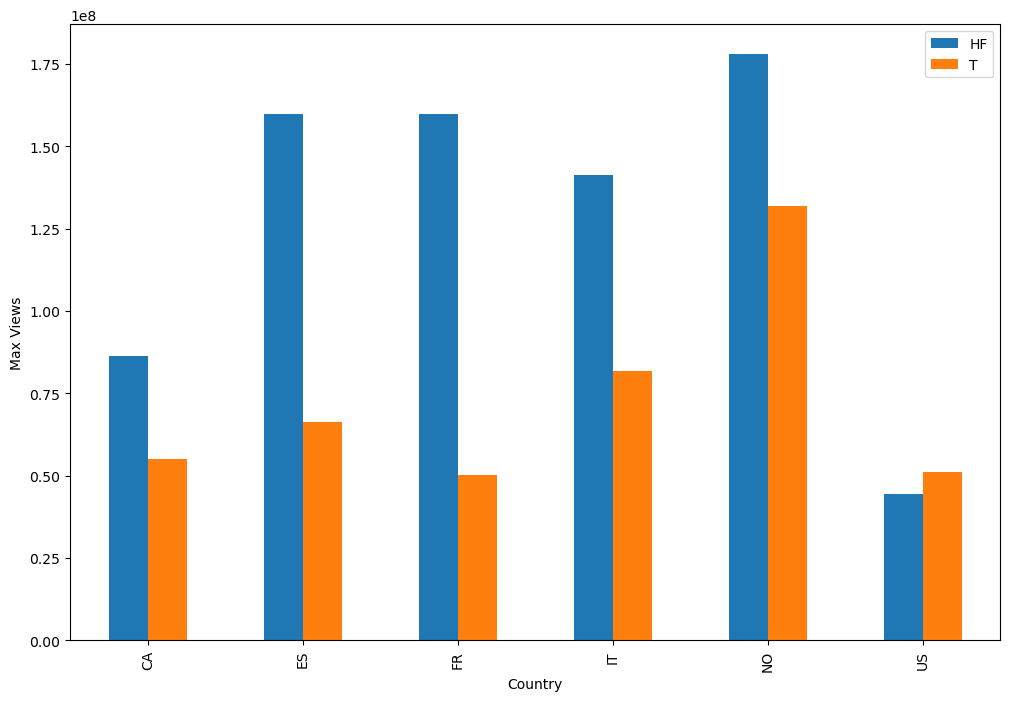

In [55]:
# Group by country and date
duration_vs_views_by_country = df_try.groupby(['country', 'data_from']).agg(
    total_views=('views', 'sum'),
    avg_views=('views', 'mean'),
    video_count=('title', 'count'),  # Number of videos per category
    max_views=('views', 'max'),
    min_views=('views', 'min')
).reset_index()

pivot_data = duration_vs_views_by_country.pivot(index='country', columns='data_from', values='max_views')

pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('')
plt.ylabel('Max Views')
plt.xlabel('Country')
plt.legend(title='')
plt.show()

In [25]:
df_time = df_try[(df_try['country']== 'CA') &(df_try['views']) & (df_try['seconds']) & (df_try['time'])]

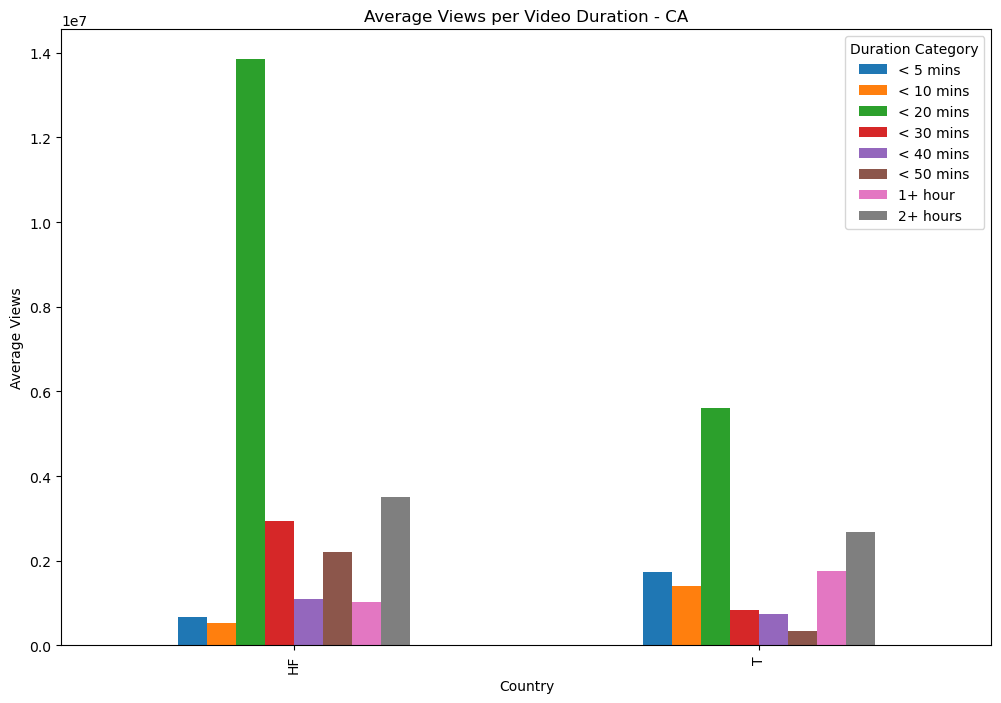

In [26]:
# Group by country and duration category
duration_vs_views_by_country = df_time.groupby(['data_from', 'duration_category']).agg(
    total_views=('views', 'sum'),
    avg_views=('views', 'mean'),
    video_count=('title', 'count'),  # Number of videos per category
    max_views=('views', 'max')
).reset_index()

# Pivot the data for easier plotting
pivot_data = duration_vs_views_by_country.pivot(index='data_from', columns='duration_category', values='avg_views')

# Bar plot for total views by duration category in each country
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Average Views per Video Duration - CA')
plt.ylabel('Average Views')
plt.xlabel('Country')
plt.legend(title='Duration Category')
plt.show()

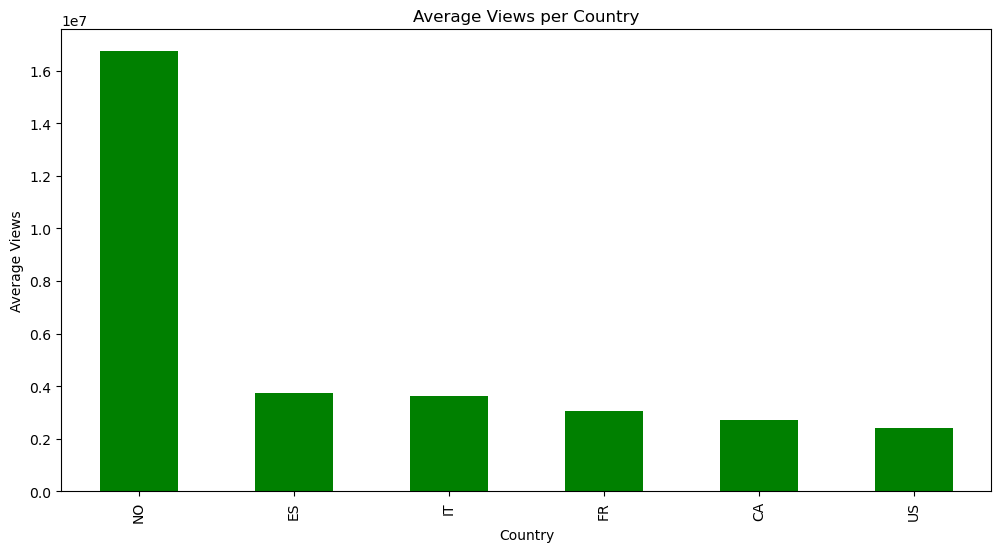

In [246]:
# Average views per country
avg_views_by_country = df_try.groupby('country')['views'].mean().sort_values(ascending=False)

# Bar plot of average views per country
avg_views_by_country.plot.bar(y='bar', figsize=(12, 6), color='green')
plt.title('Average Views per Country')
plt.ylabel('Average Views')
plt.xlabel('Country')
plt.show()

### top videos categories

In [36]:
df_top_views = df_try[['country', 'title', 'views', 'HH:MM:SS', 'seconds']]
df_top_views.drop_duplicates(subset=['title'],inplace=True)

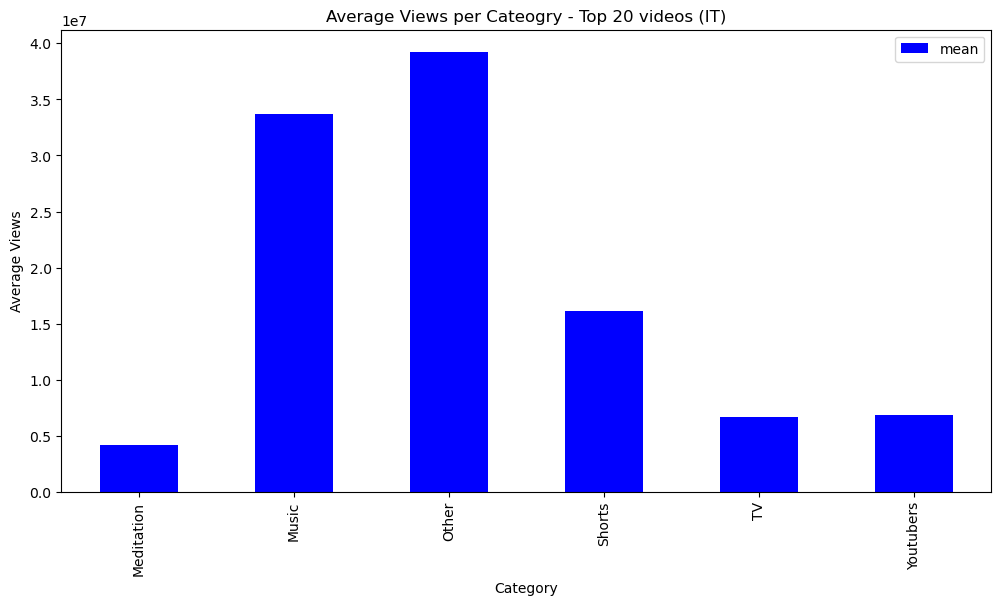

In [37]:
##Categories in 20 top videos IT
df_most_view_title = df_top_views[(df_top_views['country']== 'IT') &(df_top_views['views'])& (df_top_views['HH:MM:SS'])]
df_IT = df_most_view_title.nlargest(20, 'views')[['title', 'views', 'HH:MM:SS', 'seconds']]


#lowercase the titles
df_IT['title'] = df_IT['title'].str.lower()

df_IT.loc[df_IT['title'].str.contains('jerry', case=False, na=False), 'title'] = 'Cartooons'
df_IT.loc[df_IT['title'].str.contains('mrbeast|shorts|boba|foil|emojis|screws|huh|boat|hack', case=False, na=False), 'title'] = 'Shorts'
df_IT.loc[df_IT['title'].str.contains('mix|audio|rhythm', case=False, na=False), 'title'] = 'Music'
df_IT.loc[df_IT['title'].str.contains('melatonin', case=False, na=False), 'title'] = 'Meditation'
df_IT.loc[df_IT['title'].str.contains('kylian|influencer', case=False, na=False), 'title'] = 'Youtubers'
df_IT.loc[df_IT['title'].str.contains('bölüm', case=False, na=False), 'title'] = 'TV'


categories = ['Cartoons', 'Shorts', 'Music', 'Meditation', 'Youtubers', 'TV']
df_IT['title'] = df_IT['title'].apply(lambda x : x if x in categories else 'Other')

#calculate mean
df_mean_IT=df_IT.groupby('title')['views'].agg(['mean'])

# Bar plot of average views per country
df_mean_IT.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Average Views per Cateogry - Top 20 videos (IT)')
plt.ylabel('Average Views')
plt.xlabel('Category')
plt.show()

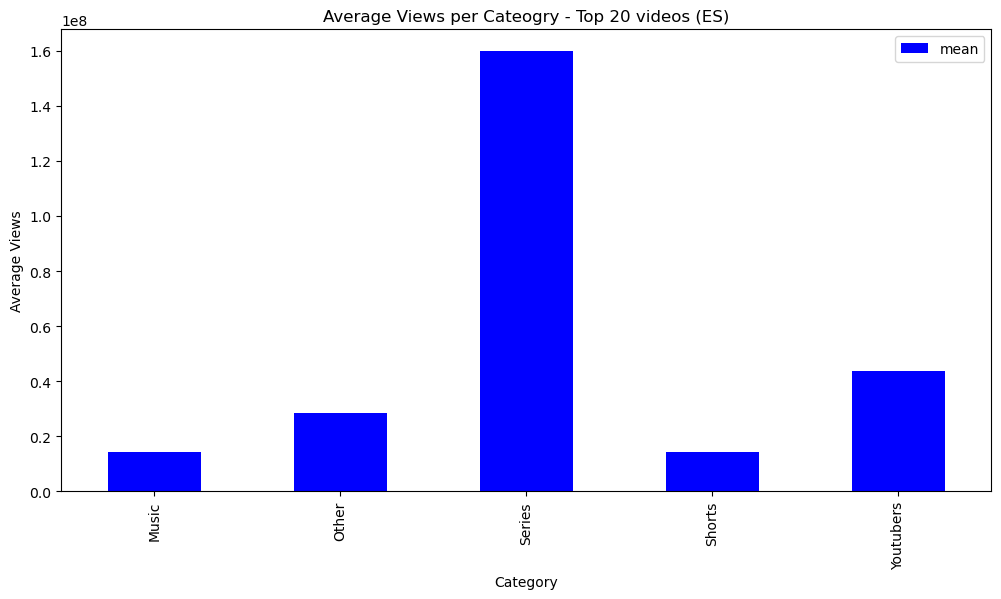

In [38]:
##Categories in 20 top videos ES
df_most_view_title = df_top_views[(df_top_views['country']== 'ES') &(df_top_views['views'])& (df_top_views['HH:MM:SS'])]
df_ES = df_most_view_title.nlargest(20, 'views')[['title', 'views', 'HH:MM:SS', 'seconds']]


#lowercase the titles
df_ES['title'] = df_ES['title'].str.lower()

df_ES.loc[df_ES['title'].str.contains('season', case=False, na=False), 'title'] = 'Series'
df_ES.loc[df_ES['title'].str.contains('robot|unauthentic|reflex', case=False, na=False), 'title'] = 'Shorts'
df_ES.loc[df_ES['title'].str.contains('muaiqly|music|playlist|lyrics|shakira|songs|rashed|hip', case=False, na=False), 'title'] = 'Music'
df_ES.loc[df_ES['title'].str.contains('twins|pierdo|jackson|youtuber', case=False, na=False), 'title'] = 'Youtubers'


categories = ['Series', 'Shorts', 'Music', 'Youtubers', 'Other']
df_ES['title'] = df_ES['title'].apply(lambda x : x if x in categories else 'Other')

#calculate mean
df_mean_ES=df_ES.groupby('title')['views'].agg(['mean'])

# Bar plot of average views per country
df_mean_ES.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Average Views per Cateogry - Top 20 videos (ES)')
plt.ylabel('Average Views')
plt.xlabel('Category')
plt.show()

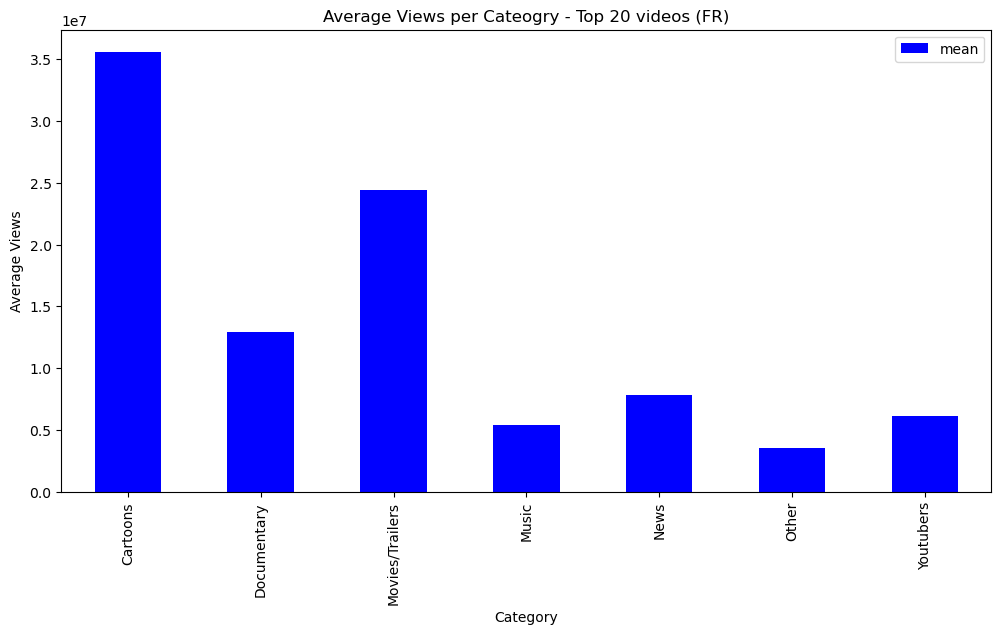

In [39]:
##Categories in 20 top videos FR
df_most_view_title = df_top_views[(df_top_views['country']== 'FR') &(df_top_views['views'])& (df_top_views['HH:MM:SS'])]
df_FR = df_most_view_title.nlargest(20, 'views')[['title', 'views', 'HH:MM:SS', 'seconds']]


#lowercase the titles
df_FR['title'] = df_FR['title'].str.lower()

df_FR.loc[df_FR['title'].str.contains('tnews', case=False, na=False), 'title'] = 'News'
df_FR.loc[df_FR['title'].str.contains('musique|music|playlist|rock|quran', case=False, na=False), 'title'] = 'Movies/Trailers'
df_FR.loc[df_FR['title'].str.contains('cartoons', case=False, na=False), 'title'] = 'Cartoons'
df_FR.loc[df_FR['title'].str.contains('rehearsal|sounds', case=False, na=False), 'title'] = 'Music'
df_FR.loc[df_FR['title'].str.contains('youtubeurs|most|meilleur|squeezie|child|hilarant|anecdotes', case=False, na=False), 'title'] = 'Youtubers'
df_FR.loc[df_FR['title'].str.contains('documentary', case=False, na=False), 'title'] = 'Documentary'
df_FR.loc[df_FR['title'].str.contains('housing|comedy', case=False, na=False), 'title'] = 'Other'


categories = ['News', 'Movies/Trailers', 'Cartoons', 'Music', 'Youtubers', 'Documentary', 'Other']
df_FR['title'] = df_FR['title'].apply(lambda x : x if x in categories else 'Other')

#calculate mean
df_mean_FR=df_FR.groupby('title')['views'].agg(['mean'])

# Bar plot of average views per country
df_mean_FR.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Average Views per Cateogry - Top 20 videos (FR)')
plt.ylabel('Average Views')
plt.xlabel('Category')
plt.show()

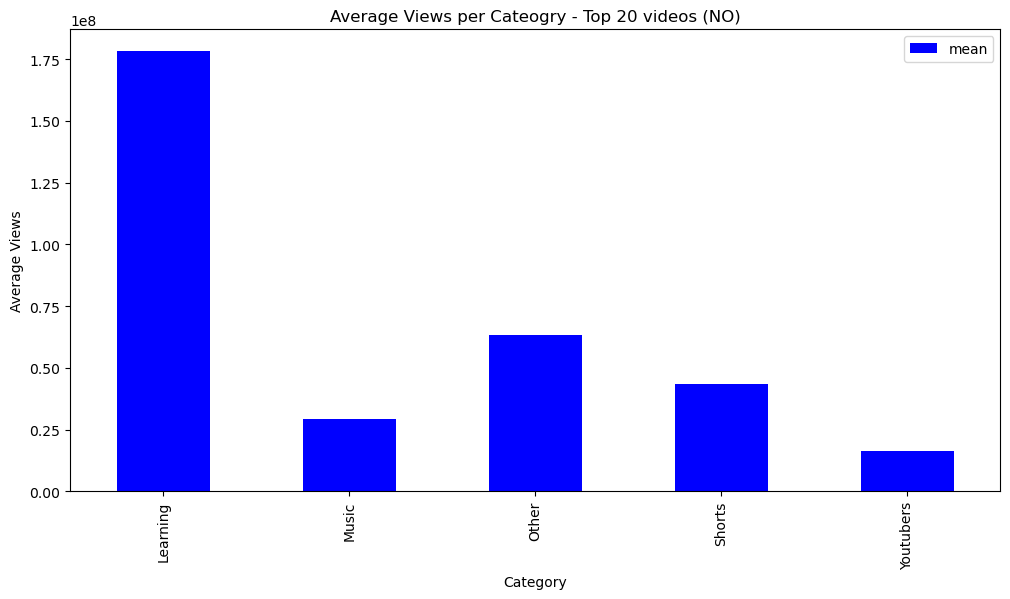

In [40]:
##Categories in 20 top videos NO
df_most_view_title = df_top_views[(df_top_views['country']== 'NO') &(df_top_views['views'])& (df_top_views['HH:MM:SS'])]
df_NO = df_most_view_title.nlargest(20, 'views')[['title', 'views', 'HH:MM:SS', 'seconds']]

#lowercase the titles
df_NO['title'] = df_NO['title'].str.lower()

df_NO.loc[df_NO['title'].str.contains('learning', case=False, na=False), 'title'] = 'Learning'
df_NO.loc[df_NO['title'].str.contains('music|alafasy', case=False, na=False), 'title'] = 'Music'
df_NO.loc[df_NO['title'].str.contains('school', case=False, na=False), 'title'] = 'Youtubers'
df_NO.loc[df_NO['title'].str.contains('lunchly|supgraded|kikakim|trap|arm|hack|minecraft|kicks|lighter|experiment|pitch|watermelon|triple', case=False, na=False), 'title'] = 'Shorts'

categories = ['Learning', 'Music', 'Youtubers', 'Shorts']
df_NO['title'] = df_NO['title'].apply(lambda x : x if x in categories else 'Other')

#calculate mean
df_mean_NO=df_NO.groupby('title')['views'].agg(['mean'])

# Bar plot of average views per country
df_mean_NO.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Average Views per Cateogry - Top 20 videos (NO)')
plt.ylabel('Average Views')
plt.xlabel('Category')
plt.show()

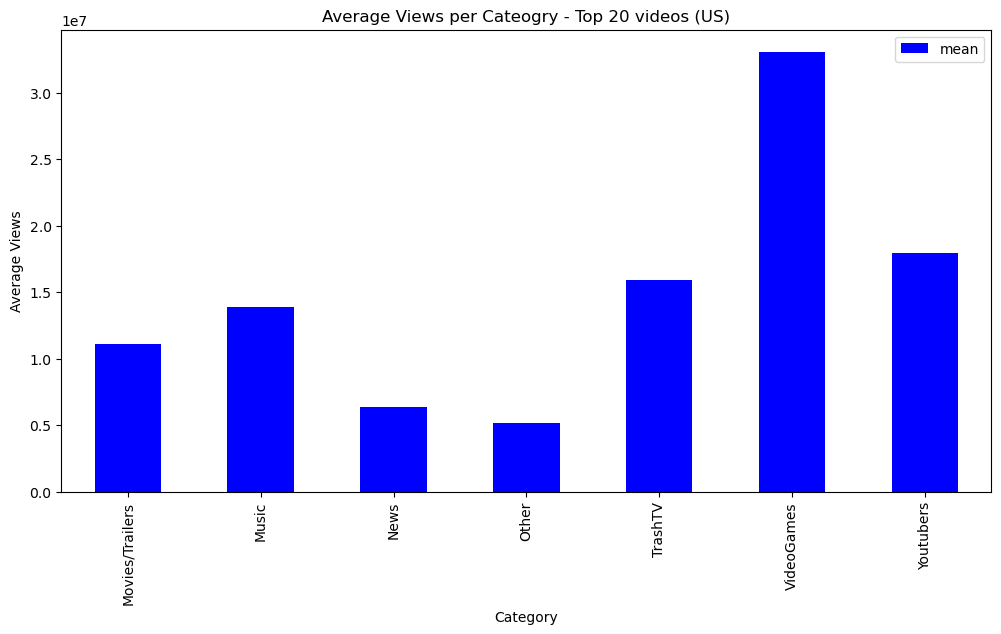

In [41]:
##Categories in 20 top videos US
df_most_view_title = df_top_views[(df_top_views['country']== 'US') &(df_top_views['views'])& (df_top_views['HH:MM:SS'])]
df_US = df_most_view_title.nlargest(20, 'views')[['title', 'views', 'HH:MM:SS', 'seconds']]

#lowercase the titles
df_US['title'] = df_US['title'].str.lower()

df_US.loc[df_US['title'].str.contains('debate|hurricane', case=False, na=False), 'title'] = 'News'
df_US.loc[df_US['title'].str.contains('movie|opening|dhar|teaser', case=False, na=False), 'title'] = 'Movies/Trailers'
df_US.loc[df_US['title'].str.contains('playlist|music', case=False, na=False), 'title'] = 'Music'
df_US.loc[df_US['title'].str.contains('underground', case=False, na=False), 'title'] = 'VideoGames'
df_US.loc[df_US['title'].str.contains('shift|headquarters|sidemen|alaskan|drive', case=False, na=False), 'title'] = 'Youtubers'
df_US.loc[df_US['title'].str.contains('sketches|nightmares', case=False, na=False), 'title'] = 'TrashTV'
df_US.loc[df_US['title'].str.contains('sea|experiment|gumball', case=False, na=False), 'title'] = 'Other'


categories = ['News', 'Movies/Trailers', 'Music', 'VideoGames', 'Youtubers', 'TrashTV', 'Other']
df_US['title'] = df_US['title'].apply(lambda x : x if x in categories else 'Other')

#calculate mean
df_mean_US=df_US.groupby('title')['views'].agg(['mean'])

# Bar plot of average views per country
df_mean_US.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Average Views per Cateogry - Top 20 videos (US)')
plt.ylabel('Average Views')
plt.xlabel('Category')
plt.show()

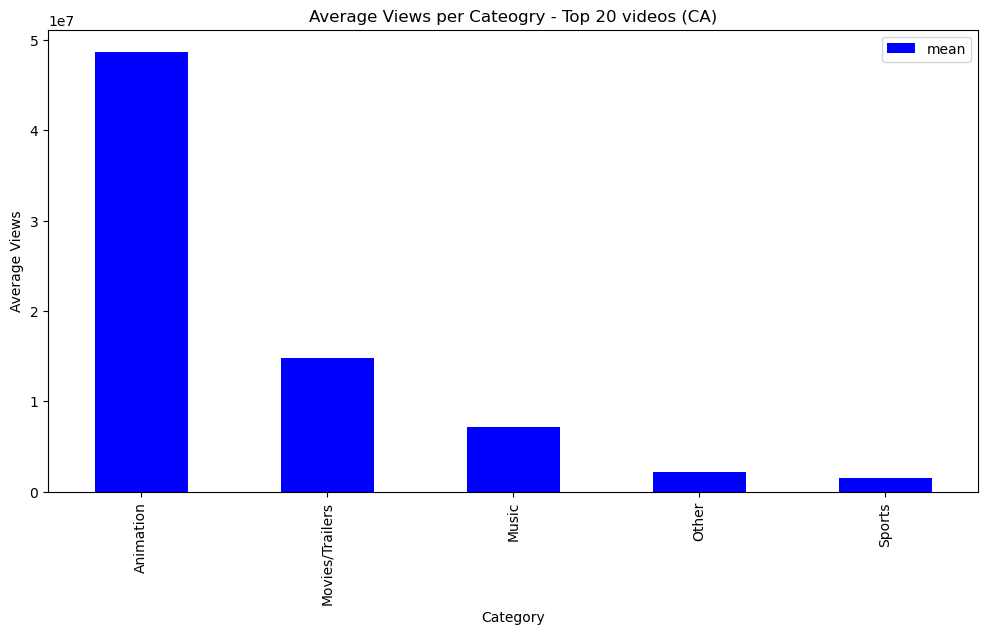

In [43]:
##Categories in 20 top videos CA
df_most_view_title = df_top_views[(df_top_views['country']== 'CA') &(df_top_views['views'])& (df_top_views['HH:MM:SS'])]
df_CA = df_most_view_title.nlargest(20, 'views')[['title', 'views', 'HH:MM:SS', 'seconds']]

#lowercase the titles CA
df_CA['title'] = df_CA['title'].str.lower()

df_CA.loc[df_CA['title'].str.contains('flipbook', case=False, na=False), 'title'] = 'Animation'
df_CA.loc[df_CA['title'].str.contains('trailer|teaser', case=False, na=False), 'title'] = 'Movies/Trailers'
df_CA.loc[df_CA['title'].str.contains('music|dj|songs|playlist|mix', case=False, na=False), 'title'] = 'Music'
df_CA.loc[df_CA['title'].str.contains('forced', case=False, na=False), 'title'] = 'Youtubers'
df_CA.loc[df_CA['title'].str.contains('nfl|footballer|football', case=False, na=False), 'title'] = 'Sports'
df_CA.loc[df_CA['title'].str.contains('hiding|internet|tesla|lies', case=False, na=False), 'title'] = 'Other'


categories = ['Animation', 'Movies/Trailers', 'Music', 'Youtubers', 'Sports', 'Other']
df_CA['title'] = df_CA['title'].apply(lambda x : x if x in categories else 'Other')

#calculate mean
df_mean_CA=df_CA.groupby('title')['views'].agg(['mean'])

# Bar plot of average views per country
df_mean_CA.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Average Views per Cateogry - Top 20 videos (CA)')
plt.ylabel('Average Views')
plt.xlabel('Category')
plt.show()

### correlation

In [45]:
corr_dic = {
    'IT': '-0.056',
    'ES': '-0.041',
    'FR': '0.005',
    'NO': '-0.080',
    'US': '-0.035'
}
df_corr = pd.Series(corr_dic).astype(float)


<Axes: >

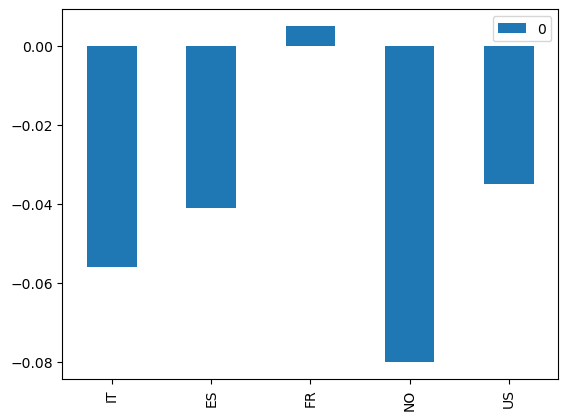

In [42]:
df = pd.DataFrame(df_corr)
df.plot.bar()

In [28]:
df_correlation = df_try[(df_try['country'] == 'US') & (df_try['views']) & (df_try['seconds'])]

df_correlation['views'] = pd.to_numeric(df_correlation['views'], errors='coerce')
df_correlation['seconds'] = pd.to_numeric(df_correlation['seconds'], errors='coerce')

df_clean = (df_correlation[['views', 'seconds']].dropna())


correlation, p_value = pearsonr(df_clean['views'], df_clean['seconds'])

In [33]:
correlation = df_correlation['views'].corr(df_correlation['seconds'])
print(f"Correlation between Video Duration and Views: {correlation}")

Correlation between Video Duration and Views: -0.04144970600086657


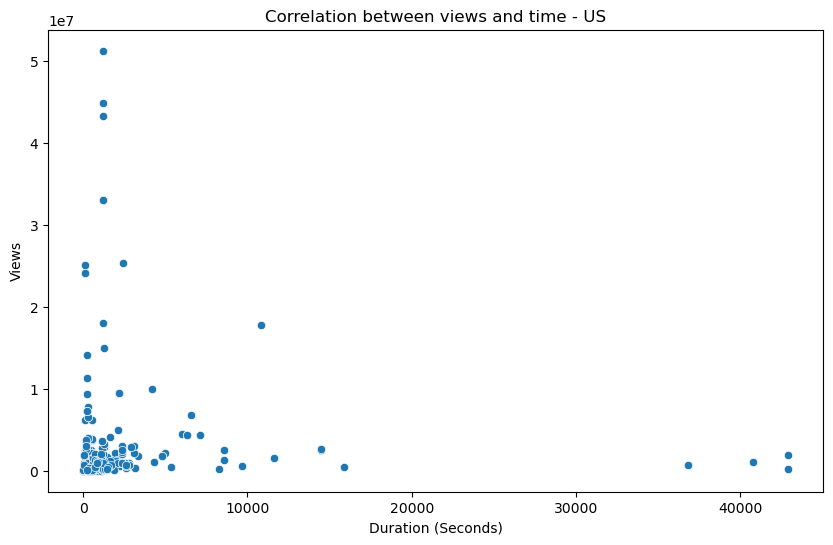

In [92]:
# Visualize the relationship with a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='seconds', y='views', data=df_clean)
plt.title('Correlation between views and time - US')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Views')
plt.show()

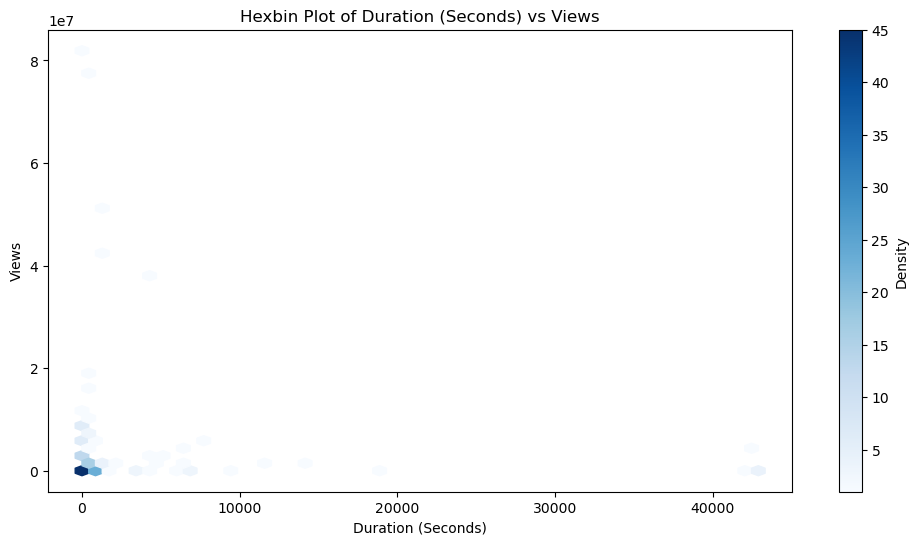

In [135]:
# Not used
# Hexbin plot for density visualization
plt.figure(figsize=(12, 6))
plt.hexbin(df_clean['seconds'], df_clean['views'], gridsize=50, cmap='Blues', mincnt=1)

# Add color bar
plt.colorbar(label='Density')

# Add title and axis labels
plt.title('Hexbin Plot of Duration (Seconds) vs Views')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Views')

plt.show()